In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
dum_df = df[df['workclass'] != '?']
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [5]:
columns = df.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.apply(lambda x :x=='?',axis=1).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
total  = df.workclass.value_counts(dropna=False)
percent = round(df.workclass.value_counts(dropna=False,normalize=True)*100,2)
pd.concat([total,percent],names=['total','percent'],axis=1)

,workclass,workclass
Private,22696,69.70
Self-emp-not-inc,2541,7.80
Local-gov,2093,6.43
?,1836,5.64
State-gov,1298,3.99
Self-emp-inc,1116,3.43
Federal-gov,960,2.95
Without-pay,14,0.04
Never-worked,7,0.02


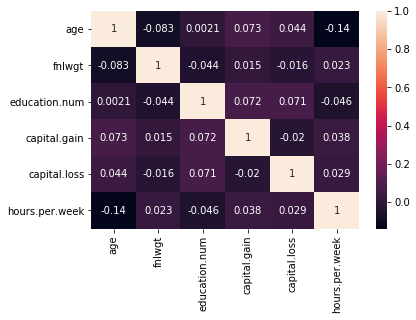

In [8]:
workclass_df = df[df.workclass == '?']
sns.heatmap(workclass_df.corr(),annot=True)

In [9]:
workclass_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
workclass_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K


In [11]:
dummy_work_df = workclass_df.drop(['workclass','occupation','native.country'],axis=1)
dummy_work_df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.082535,0.002081,0.072523,0.043599,-0.138976
fnlwgt,-0.082535,1.000000,-0.044200,0.014508,-0.015572,0.022762
education.num,0.002081,-0.044200,1.000000,0.071851,0.071484,-0.045758
capital.gain,0.072523,0.014508,0.071851,1.000000,-0.020206,0.037798
capital.loss,0.043599,-0.015572,0.071484,-0.020206,1.000000,0.029185
hours.per.week,-0.138976,0.022762,-0.045758,0.037798,0.029185,1.000000


In [12]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [13]:
df.sex.values

array(['Female', 'Female', 'Female', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [14]:
round(workclass_df.describe())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1836.0,1836.0,1836.0,1836.0,1836.0,1836.0
mean,41.0,188516.0,9.0,607.0,61.0,32.0
std,20.0,107090.0,3.0,5147.0,355.0,15.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,21.0,117771.0,9.0,0.0,0.0,20.0
50%,35.0,175617.0,9.0,0.0,0.0,36.0
75%,61.0,234568.0,10.0,0.0,0.0,40.0
max,90.0,981628.0,16.0,99999.0,4356.0,99.0


In [15]:
workclass_df.sex.value_counts()

Male      997
Female    839
Name: sex, dtype: int64

In [16]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

Text(0.5, 1.0, 'understanding workclass')

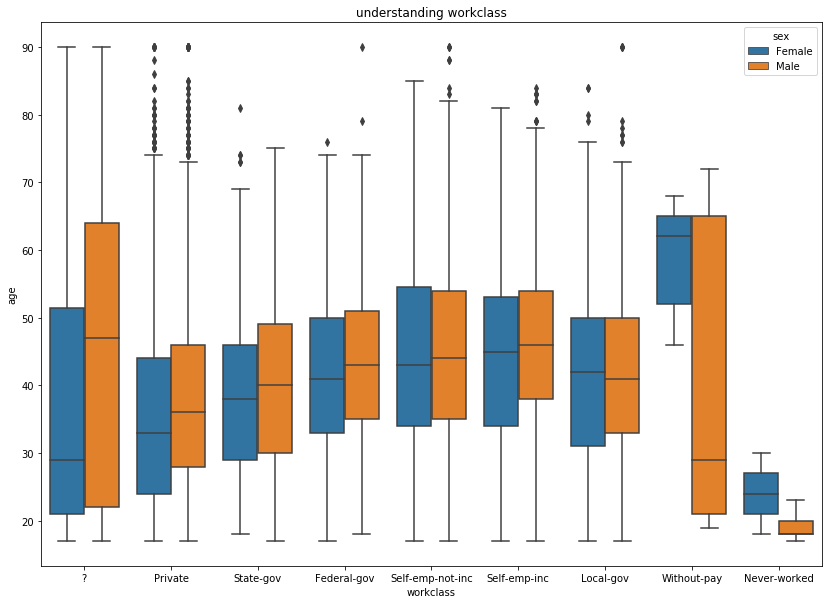

In [17]:
plt.figure(figsize=(14,10))

ax0 = sns.boxplot(x='workclass',y='age',hue='sex',data=df)
plt.title('understanding workclass')

In [18]:
# converting sex into numerical value
df.sex = df.sex.apply(lambda x : 1 if x == "Male" else 0)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K


In [19]:
# replacing the ? to private
df.workclass = df.workclass.replace('?','Private')

In [20]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K


In [21]:
df.occupation = df.occupation.replace('?','Nothing')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Nothing,Not-in-family,White,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Nothing,Unmarried,Black,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K


In [22]:
# understanding the percentage of each value in occupation 
count = df.occupation.value_counts(dropna=False)
percent = round(df.occupation.value_counts(dropna=False,normalize=True)*100,2)
pd.concat([count,percent],names=['count','percent'],axis=1)

,occupation,occupation
Prof-specialty,4140,12.71
Craft-repair,4099,12.59
Exec-managerial,4066,12.49
Adm-clerical,3770,11.58
Sales,3650,11.21
Other-service,3295,10.12
Machine-op-inspct,2002,6.15
Nothing,1843,5.66
Transport-moving,1597,4.90
Handlers-cleaners,1370,4.21


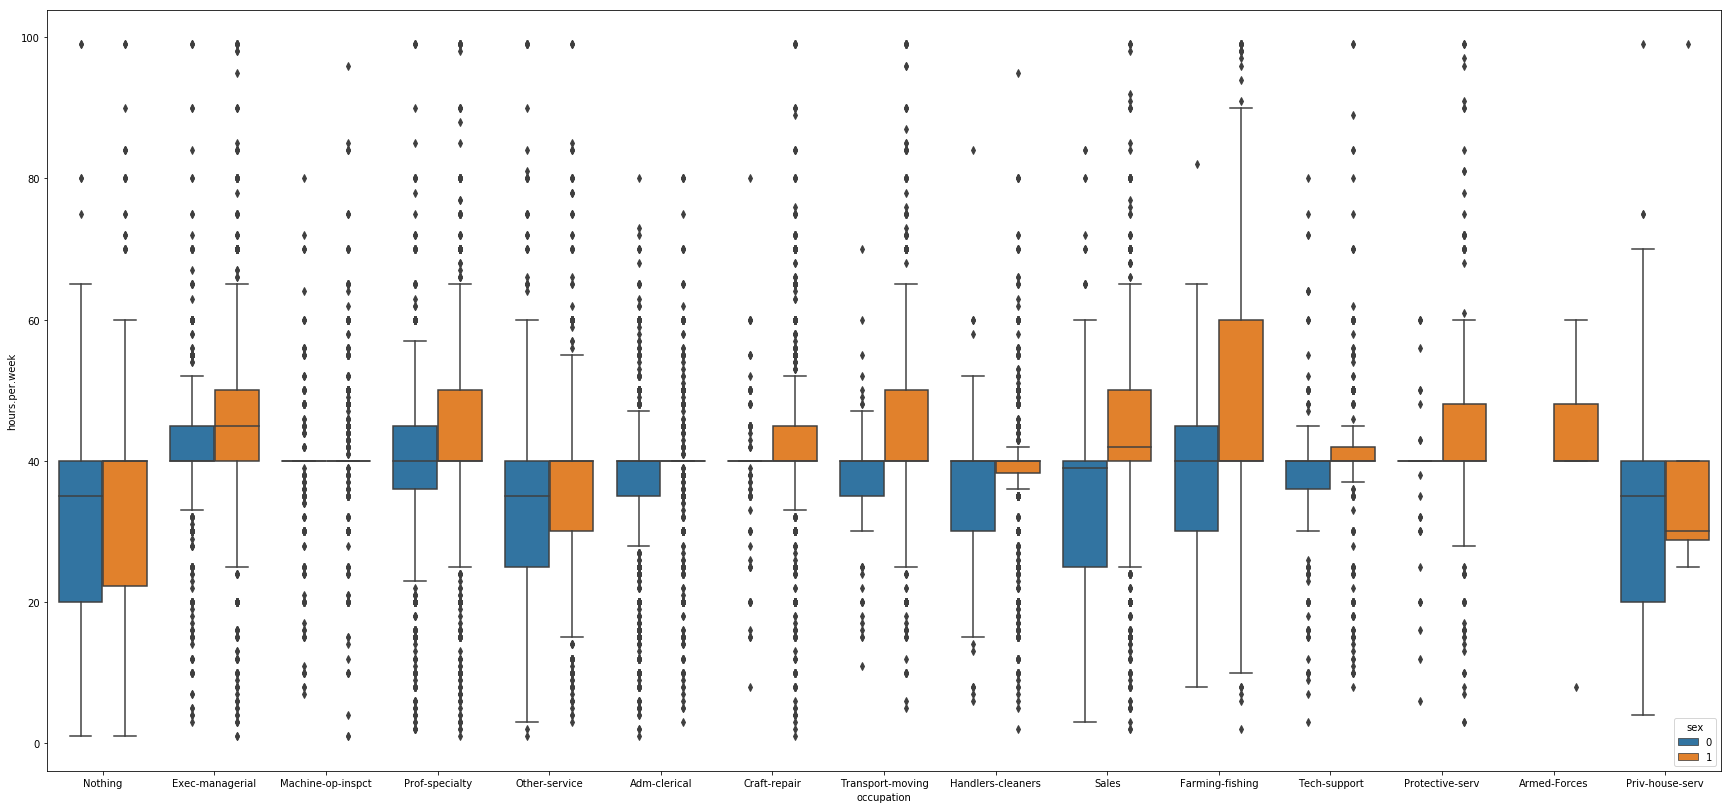

In [23]:
plt.figure(figsize=(30,14))
sns.boxplot(x='occupation',y='hours.per.week',data=df,hue='sex')

In [24]:
df.occupation = df.occupation.replace('Nothing','Priv-house-serv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Priv-house-serv,Unmarried,Black,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K


In [25]:
# finding percentage of each value in native-country
count = df['native.country'].value_counts(dropna = False)
percent = round(df['native.country'].value_counts(dropna=False,normalize=True)*100,2)
pd.concat([count,percent],names=['count','percent'],axis=1)

,native.country,native.country
United-States,29170,89.59
Mexico,643,1.97
?,583,1.79
Philippines,198,0.61
Germany,137,0.42
Canada,121,0.37
Puerto-Rico,114,0.35
El-Salvador,106,0.33
India,100,0.31
Cuba,95,0.29


In [26]:
df = df[df['native.country'] != "?"]

df.head()
df.apply(lambda x : x =="?",axis=1).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [27]:
df.income.dtype

dtype('O')

In [28]:
# converting income to numerical categorical value
df.income = df.income.apply(lambda x : 1 if x == '>50K' else 0)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Priv-house-serv,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


In [29]:
df.income.value_counts()

0    24283
1     7695
Name: income, dtype: int64

In [30]:
df.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,native.country
count,31978,31978,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,United-States
freq,24095,10368,14692,4038,12947,27430,29170


In [31]:
df[['sex','income']].groupby('sex').describe().reset_index()

sex   income                                             
         count      mean       std  min  25%  50%  75%  max
0   0  10608.0  0.109540  0.312330  0.0  0.0  0.0  0.0  1.0
1   1  21370.0  0.305709  0.460718  0.0  0.0  0.0  1.0  1.0

In [32]:
df_summ = df.groupby('sex')
df_summ.mean().reset_index()

,sex,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,0,36.852564,185869.007730,10.030072,551.501980,60.611048,36.394042,0.109540
1,1,39.436032,191622.860786,10.091671,1318.942022,99.709359,42.415255,0.305709


11% woman make make more than 50k in income as compared to 31% men 

/home/ajay/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x7f49bbe7b240>,
 <a list of 2 Text xticklabel objects>)

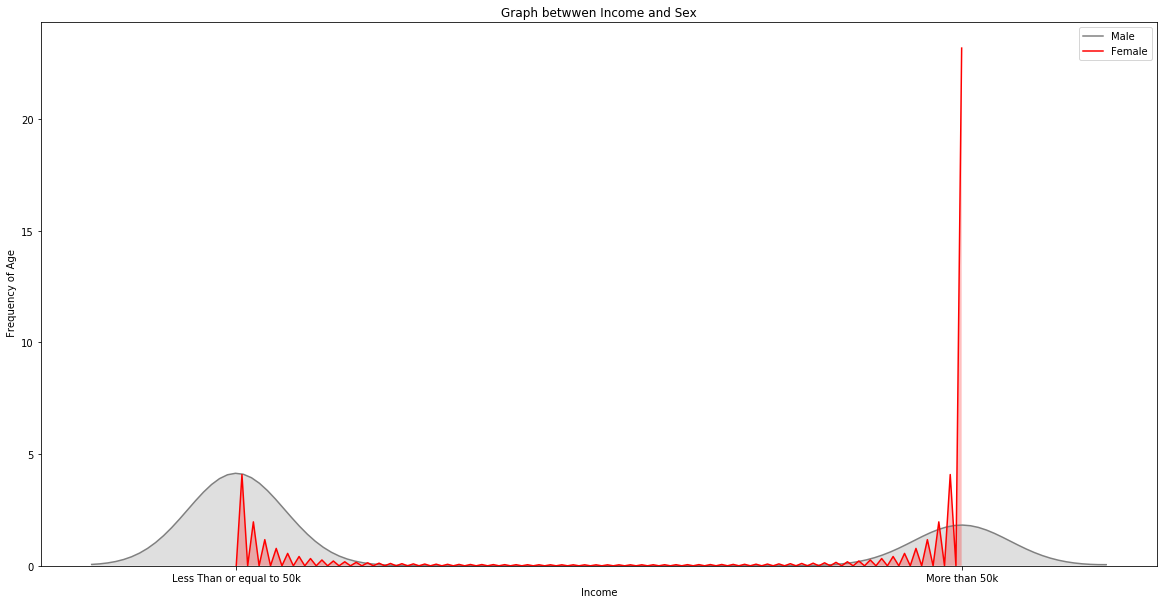

In [33]:
plt.figure(figsize = (20,10))
sns.kdeplot(df.income[df.sex == 1],shade=True, color = 'grey',label = "Male")
sns.kdeplot(df.income[df.sex == 0],shade=True, color = 'r',label = "Female")
plt.xlabel("Income")
plt.ylabel(" Frequency of Age")
plt.title("Graph betwwen Income and Sex")
label = ['Less Than or equal to 50k','More than 50k']
plt.xticks(ticks= sorted(df.income.unique()),labels = label)

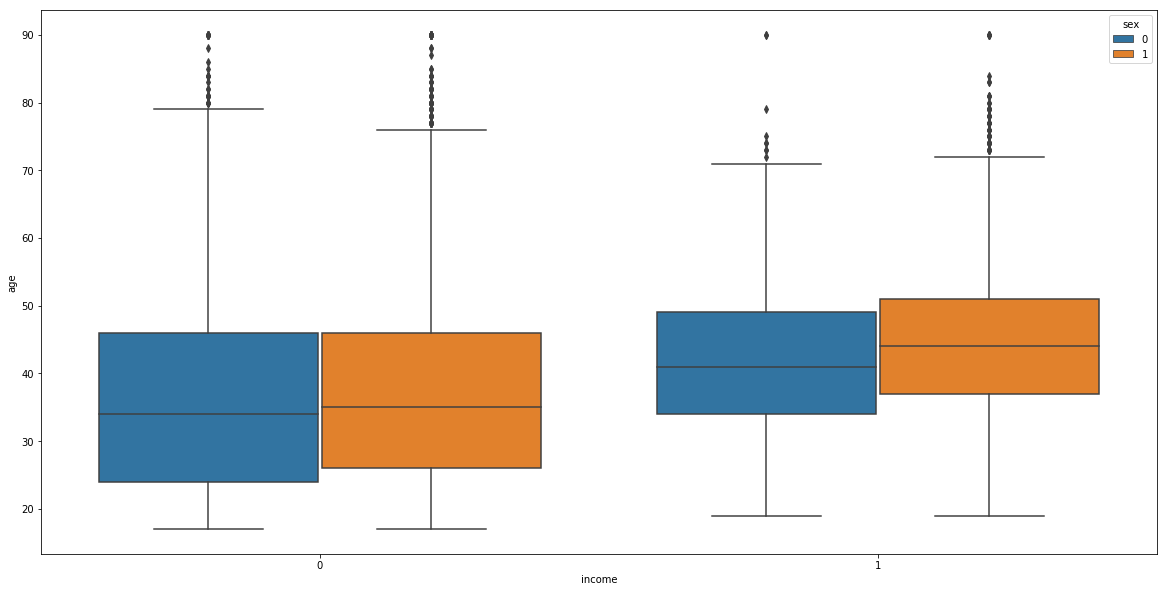

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.income,y = df.age,hue=df.sex,data=df)

I. Less than 50K
1. The avg no if woman and men earning less than 50k is more or less same .
2. Woman tend to work at younger age than men when earning money .
3. The avg for woman earning less than 50k is 25 to 45 and for men its 27 to 45 (rough estimate)

II. More than 50k
1. The avg no if woman and men earning more than 50k is more or less same .
2. People earn more than 50k when they are older ie in the age bracket of 30 to 50 ; makes sense as it takes experince to earn more .

### Correlation

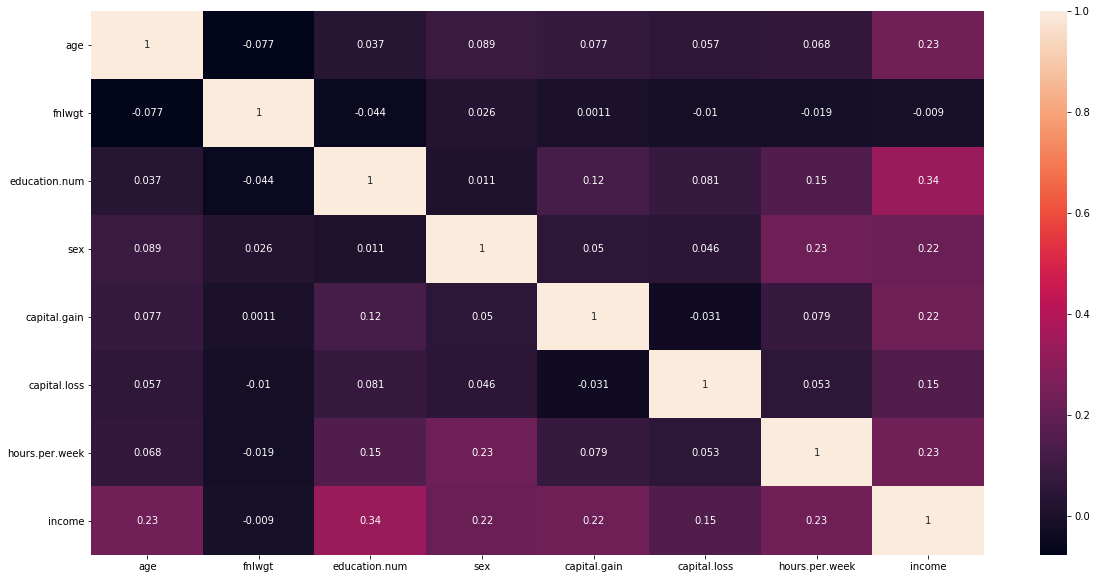

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

1. The correlation between education.num and income is (0.34) stating that people with better education.num had better inncome .
2. The amount of hours per week and income has a correlation of 0.23


### Statistical analysis

In [36]:
man_mean = df[df.sex == 1].income.mean()
woman_mean = df[df.sex == 0].income.mean()
print("Mean of men earning ",man_mean)
print("Mean of women earning ",woman_mean)
print("Differnce between the means ",(man_mean - woman_mean))

Mean of men earning  0.30570893776321945
Mean of women earning  0.10953996983408748
Differnce between the means  0.19616896792913197


### Data is now cleaned 

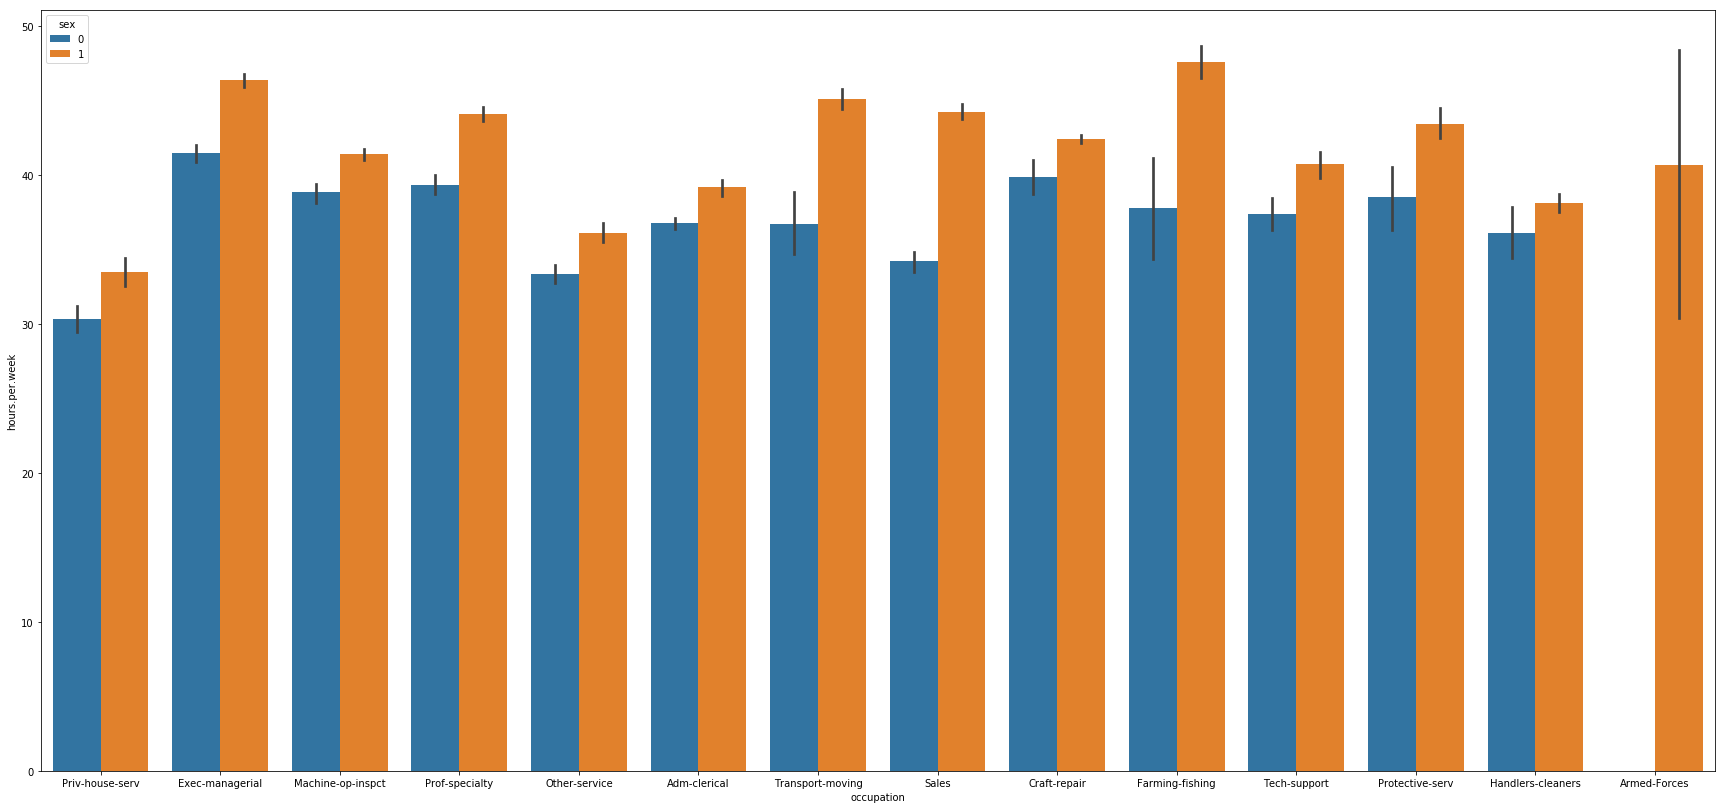

In [37]:
plt.figure(figsize=(30,14))
sns.barplot(x='occupation',y='hours.per.week',data=df,hue='sex')

In [38]:
df = pd.get_dummies(df,columns=['workclass','education','marital.status','occupation','relationship',
                               'race','native.country'],drop_first=True)

In [39]:
X = df.drop(['income'],axis=1)

In [40]:
y = df.income

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dtr = DecisionTreeRegressor(criterion='mae',max_depth=5)

In [49]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [51]:
y_pred = dtr.predict(X_test)

In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      9726
         1.0       0.28      0.88      0.43       827

   micro avg       0.82      0.82      0.82     10553
   macro avg       0.64      0.84      0.66     10553
weighted avg       0.93      0.82      0.85     10553



In [53]:
print(confusion_matrix(y_pred,y_test))

[[7894 1832]
 [ 102  725]]


In [54]:
print(accuracy_score(y_pred,y_test))

0.8167345778451626


### Exploratory fun

/home/ajay/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of race wrt to sex')

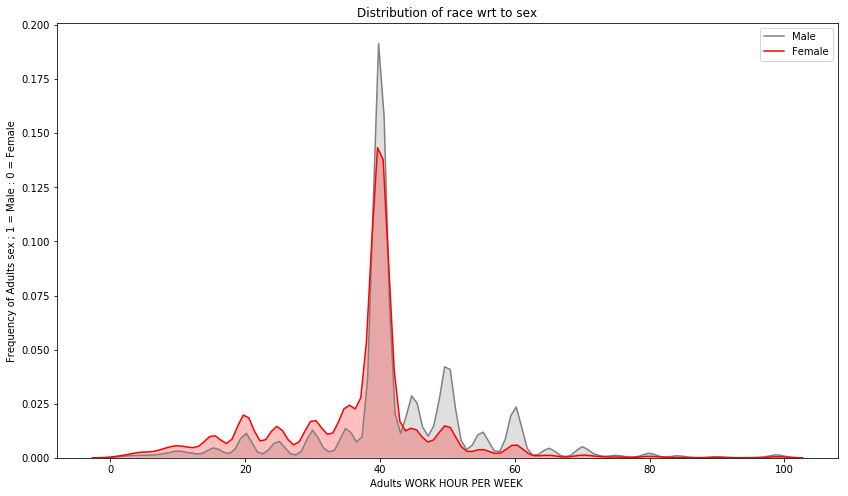

In [55]:
plt.figure(figsize=(14,8))
sns.kdeplot( df.loc[(df.sex == 1),'hours.per.week'],shade=True,color='grey',label="Male")
sns.kdeplot( df.loc[(df.sex == 0),'hours.per.week'],shade=True,color='r',label="Female")
plt.xlabel('Adults WORK HOUR PER WEEK ')
plt.ylabel('Frequency of Adults sex ; 1 = Male : 0 = Female')
plt.title("Distribution of race wrt to sex")
